In [2]:
import os
import cv2
import numpy as np

path = '/home/arron/dataset/U-RSIC/complex/train_split_256x256/label'
img_list = os.listdir(path)

img1 = cv2.imread(os.path.join(path, '0189_1_1565791505_73_0_0.tiff'), cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(os.path.join(path, '0189_1_1565791505_73_0_1.tiff'), cv2.IMREAD_GRAYSCALE)

def encode_segmap(label_img):
    label_img = label_img.astype(int)
    label_mask = np.zeros(label_img.shape, dtype=np.int16)
    label_opp = np.ones(label_img.shape, dtype=np.int16)

    label_mask[np.where(label_img == 255)] = 1
    label_mask = label_mask ^ label_opp
    
    return label_mask

def decode_segmap(output):
    output = output.astype(int)
    label_mask = np.zeros(output.shape, dtype=np.int16)

    label_mask[np.where(output == 0)] = 255
    label_mask[np.where(output == 1)] = 0
    return label_mask


decode_segmap(encode_segmap(img1))

array([[255, 255,   0, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int16)

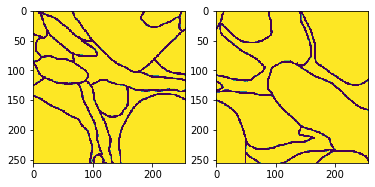

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(img2)
plt.show()

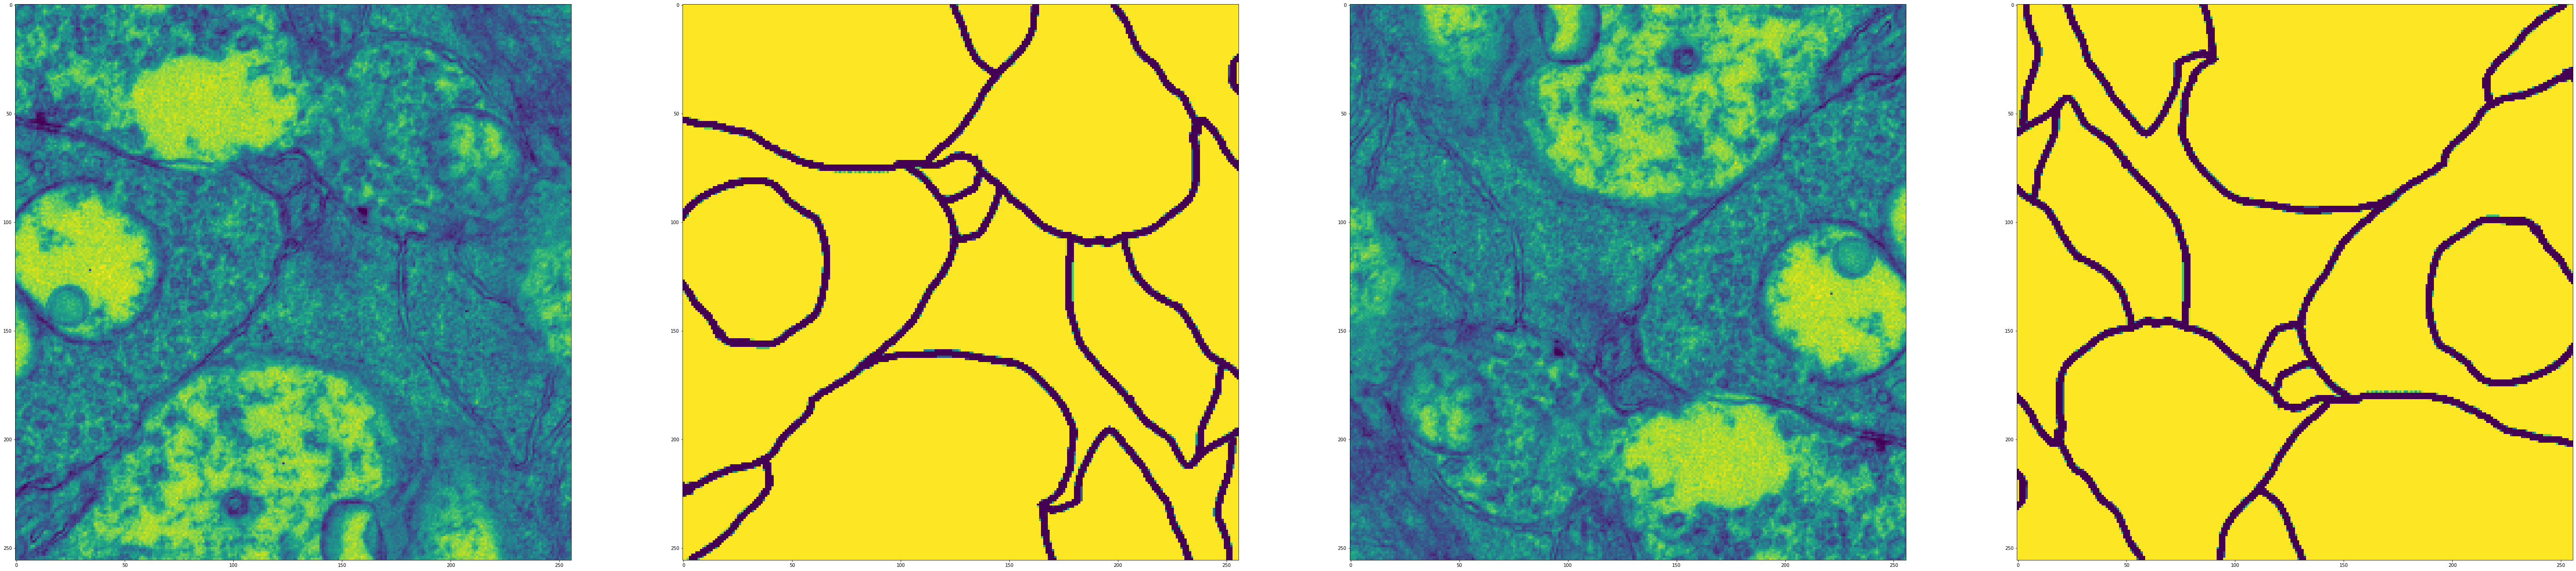

In [14]:
import albumentations as A
import random

data_path = '/home/arron/dataset/U-RSIC/complex/data_split_256x256'
img_list = os.listdir(os.path.join(data_path, 'img'))
random.shuffle(img_list)

for img_file in img_list:
    label_file = img_file.replace("png", "tiff")
    img = cv2.imread(os.path.join(data_path, 'img', img_file), cv2.IMREAD_GRAYSCALE)
    label = cv2.imread(os.path.join(data_path, 'label', label_file), cv2.IMREAD_GRAYSCALE) 
    
    sample={'image':img, 'mask':label}
    
    aug = A.Compose([
            A.RandomRotate90(p=1),
    ], p=1)
    aug_sample = aug(**sample)
    plt.figure(figsize=(100,100))
    plt.subplot(141)
    plt.imshow(img)
    plt.subplot(142)
    plt.imshow(label)
    plt.subplot(143)
    plt.imshow(aug_sample['image'])
    plt.subplot(144)
    plt.imshow(aug_sample['mask'])
    plt.show()
    break